# Departure by plane model


## Importing
Importing libraries. Setting `%matplotlib inline` to plott the graph inside the notebook

In [1]:
%matplotlib inline

import pandas as pd
import geopandas
from shapely.geometry import Point, Polygon, LineString
import fiona
import datetime
import numpy as np

Importing CSV

In [2]:
# Import Points
#df_points = pd.read_csv('data/20180521_sampled.csv')
df_points = pd.read_csv('../data_generated/20180521_sampled.csv')

In [3]:
#Import Plane list
df_planes = pd.read_csv('../data_generated/swiss_airplanes.csv')

## Join points and airplanes

In [110]:
# set index
df_planes = df_planes.set_index('icao24')

# Join
df_joined = df_points.join(df_planes, on='icao24')

In [111]:
# Only take swiss planes
df_swiss = df_joined[df_joined.status == 'active']

#Cleanup
#df_swiss['timestamp'] = pd.to_datetime(df_swiss['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_swiss = df_swiss.round({'altitude': 0})

In [112]:
df_planes = df_swiss[df_swiss['icao24'].isin(["4b1881", "4b1801", '4b1611', '4b1613', '4b17fd', '4b17f8', '4b1612'])]
#df_planes = df_swiss.copy()
df_planes = df_planes[df_swiss['altitude'] > 0]

# Create Geometry
geometry = [Point(xy) for xy in zip(df_planes.longitude, df_planes.latitude)]
geo_df = geopandas.GeoDataFrame(df_planes, crs={'init': 'epsg:4326'}, geometry=geometry)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


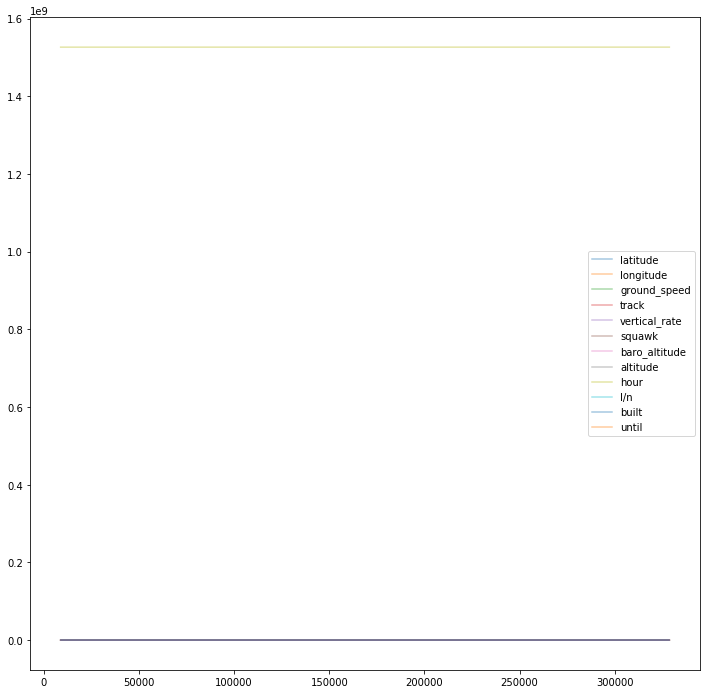

In [41]:
df_planes.plot(figsize=(12, 12),markersize=1, alpha=0.4)

In [113]:
#Drop bools and others
export = geo_df.drop(['alert', 'spi', 'onground'], axis=1)

#export
export.to_file("../qgis/certain_planes.shp")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
CPLE_NotSupported in Normalized/laundered field name: 'ground_speed' to 'ground_spe'
CPLE_NotSupported in Normalized/laundered field name: 'vertical_rate' to 'vertical_r'
CPLE_NotSupported in Normalized/laundered field name: 'baro_altitude' to 'baro_altit'
CPLE_NotSupported in Normalized/laundered field name: 'last_position' to 'last_posit'
CPLE_NotSupported in Normalized/laundered field name: 'Registration' to 'Registrati'


## Export Zurich Airport

In [94]:
# Only take swiss planes
df_planes = df_joined[df_joined.status == 'active']

#Cleanup
#df_swiss['timestamp'] = pd.to_datetime(df_swiss['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_planes = df_planes.round({'altitude': 0})

#df_planes = df_swiss[df_swiss['icao24'].isin(["4b1881", "4b1801"])]
df_planes = df_planes[df_swiss['altitude'] > 0]
df_planes = df_planes[df_swiss['altitude'] < 3000]

# Create Geometry
geometry = [Point(xy) for xy in zip(df_planes.longitude, df_planes.latitude)]
geo_df = geopandas.GeoDataFrame(df_planes, crs={'init': 'epsg:4326'}, geometry=geometry)

# Aggregate these points with the GroupBy
#geo_df = geo_df.groupby(['icao24'])['geometry'].apply(lambda x: LineString(x.tolist()))
#geo_df = geopandas.GeoDataFrame(geo_df, geometry='geometry')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [95]:
# Airport Zurich
coords = [( 8.4994, 47.4863 ), ( 8.4994, 47.4283 ), ( 8.619, 47.4283 ), ( 8.619, 47.4863 ), ( 8.4994, 47.4863 )]
zurich_airport = Polygon(coords)

In [97]:
export = geo_df[geo_df.geometry.within(zurich_airport)]
#export = geo_df.copy()

#Drop bools and others
export = export.drop(['alert', 'spi', 'onground'], axis=1)

#export
export.to_file("../qgis/certain_zurich.shp")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
CPLE_NotSupported in Normalized/laundered field name: 'ground_speed' to 'ground_spe'
CPLE_NotSupported in Normalized/laundered field name: 'vertical_rate' to 'vertical_r'
CPLE_NotSupported in Normalized/laundered field name: 'baro_altitude' to 'baro_altit'
CPLE_NotSupported in Normalized/laundered field name: 'last_position' to 'last_posit'
CPLE_NotSupported in Normalized/laundered field name: 'Registration' to 'Registrati'
